---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 6: 2D Non-Linear Convection

---

One step closer to reality is bringing **non-linearity** to the picture. This addition implies that both velocity components evolve together, influencing each other through convection processes.

Mathematically speaking we now have to solve a **pair of coupled partial differential equations** 

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

**Discretizing** these equations using the methods we've applied previously yields

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we **solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$**, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1.5)\times(0.5, 1.5) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

The boundary conditions hold u and v equal to 1 along the boundaries of the grid

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter

In [13]:
x_points = 101                                 # Number of x grid points
y_points = 101                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
v = np.ones((y_points, x_points))

u_n = np.ones((y_points, x_points))
v_n = np.ones((y_points, x_points))

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2
v[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

Now plotting the wave at the proposed IC's 

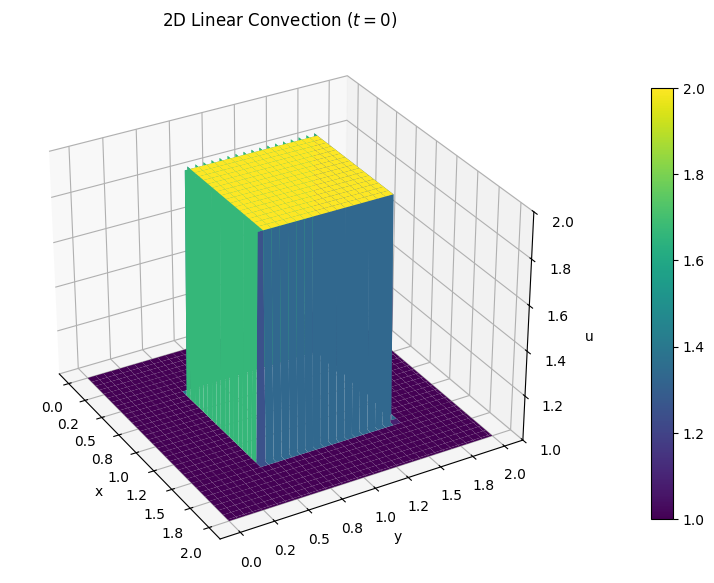

In [17]:
fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(r'2D Linear Convection ($t=0$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

Now with the iteration process, the same as the previous step but with both equations inside the vectorized loop

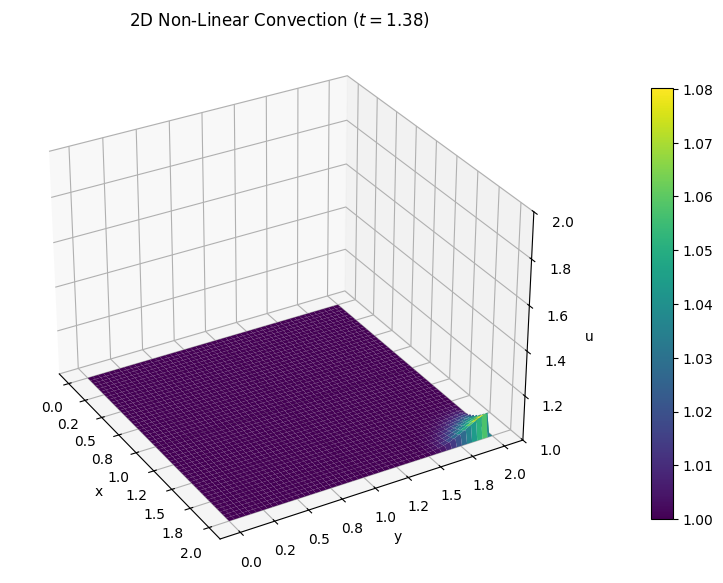

In [18]:
x_points = 101                                 # Number of x grid points
y_points = 101                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
v = np.ones((y_points, x_points))

u_n = np.ones((y_points, x_points))
v_n = np.ones((y_points, x_points))

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2
v[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

for n in range(time_steps):
    u_n = u.copy()
    u[1:, 1:] = u_n[1:, 1:] - (u_n[1:, 1:] * (dt/dx) * (u_n[1:, 1:] - u_n[1:, :-1])) - (v_n[1:, 1:] * (dt/dy) * (u_n[1:, 1:] - u_n[:-1, 1:]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    v[1:, 1:] = v_n[1:, 1:] - (u_n[1:, 1:] * (dt/dx) * (v_n[1:, 1:] - v_n[1:, :-1])) - (v_n[1:, 1:] * (dt/dy) * (v_n[1:, 1:] - v_n[:-1, 1:]))
    v[0, : ] = 1
    v[-1, : ] = 1
    v[ : , 0] = 1
    v[ : , -1] = 1 
        

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0, rstride=2, cstride=2)
axis.set_title(rf'2D Non-Linear Convection ($t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

The wave is scared of us, let's animate the process to catch it before it leaves the figure

In [20]:
x_points = 101                                 # Number of x grid points
y_points = 101                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.25                                   # CFL number
dt = sigma * dx                                # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
v = np.ones((y_points, x_points))

u_n = u.copy()
v_n = v.copy()

# Define IC's

u[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2
v[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2

plt.ioff()
fig, axis = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(11, 7))
axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
plt.colorbar(wave, ax=axis, pad=0.12, shrink=0.8)


def init():
    axis.clear()
    axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,

def update_anim(frame):
    u_n = u.copy()
    v_n = v.copy()
    u[1:, 1:] = u_n[1:, 1:] - (u_n[1:, 1:] * (dt/dx) * (u_n[1:, 1:] - u_n[1:, :-1])) - (v_n[1:, 1:] * (dt/dy) * (u_n[1:, 1:] - u_n[:-1, 1:]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    v[1:, 1:] = v_n[1:, 1:] - (u_n[1:, 1:] * (dt/dx) * (v_n[1:, 1:] - v_n[1:, :-1])) - (v_n[1:, 1:] * (dt/dy) * (v_n[1:, 1:] - v_n[:-1, 1:]))
    v[0, : ] = 1
    v[-1, : ] = 1
    v[ : , 0] = 1
    v[ : , -1] = 1 

    axis.clear()
    axis.set_title(rf'2D Linear Convection (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,


anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50
)

anim.save('2D_non_linear_convection.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()

Clearly the wave deforms, the back of the waves catches up and makes a wave front